# Note for DS2023s (python)

## I. Numpy

### Lecture Notes

#### Creating Matrixes & Vectors
-  Create a matrix with `np.array([])`:

    - *Note that numpy automatically assume that vector goes in rows (rather than columns)*
  
-   Create a stepping series with `np.linspace(start= ,stop=, num= )`
-   Reshape a matrix using `np.reshape(MATRIX_NAME,(m,n))` or `MATRIX_NAME.reshape(m,n)`
-   Create a all-ones matrix with `np.ones(SIZE)`, all-zeros matrix with `np.zeros()`, I matrix with `np.eye(SIZE)`, diagno matrix with `np.diag()`

In [30]:
import numpy as np
vec = np.array([1,2,3])
print(vec)
mat = np.array([[1.0, 2.0, 2.0], [3.0, 5.0, 4.5]])
print(mat)

[1 2 3]
[[1.  2.  2. ]
 [3.  5.  4.5]]


#### Matrix Indexing and Slicing

- Remember that in python, the index **starts from 0**
- Negative index means *the last i'th elem* , i.e. elem[-1] means the last elem in this array. ([0] points to the first does not contradict with [-1] represents the last, since if [-0] is the last one then it will puzzle the computer as -0 == 0!)
- Get a section of the vector using `x[start:end]`; mathematically, you will get $[start,end)$, which means the *end'th* elem will NOT be returned
   
    -   *Note that even for negative indexings, $start<end$ must be held (which is also apparent mathematically); thus you cannot get a series of number reversely by slicing.*
    -   *Also note that the Start-Included-End-Excluded law also works with negative integers*

In [31]:
print(vec)
print(vec[-3:-1])

[1 2 3]
[1 2]


#### Stat: Random Variables
- Set random seed by `np.random.seed(SEED_NUM)`
- Generate Uniform Dist. r.v.by `np.random.uniform(low= , high= ,size= )`
- Generate Normal Dist. r.v. by `np.random.normal(loc= , scale= , size= )`

In [32]:
norm = np.random.normal(loc=0.0, scale=1.0, size=(2, 5))
print(norm)

[[ 0.19553819  0.91263183 -1.41397622 -1.89148631 -1.8390258 ]
 [ 0.50091511  0.38039793 -0.22485646 -1.04430502  0.03158332]]


#### Stat: Some Mathematical Operations (Esp. to Matrix)
- Adding or multiplying a sclar will be automatically applied to the whole matrix
- There are some other handy build in math functions like `np.exp()`,`np.log()`,etc.
- A matrix can also be summarized with `np.sum()` (which calc. the sum of all elem's) or `np.mean()`, etc.
  - Such cal. can also be done by specifically by rows or columns by adding `np.sum(,axis=0/1)`, where `0` is for rows and `1` for columns.
    - (It is also somehow reasonable if we think of the notation of a certain elem in a matrix (i.e. A[3][4]), we are usually talking about the one in row 3, column 4, and thus row comes first than columns, and thus 0 for rows and 1 for columns)
    - Plus, 'by rows' or 'by cols' means the increasing index. E.g. if we cal the sum of a matrix by rows, we are adding the i'th elem in the 1'st row, the i'th elem in the 2'nd row, etc. as the i'th elem in the final result

In [33]:
print("e.g. mat:",norm)
print("By row:",np.mean(norm, axis=0)) 
print("By col:",np.var(norm, axis=1)) 

e.g. mat: [[ 0.19553819  0.91263183 -1.41397622 -1.89148631 -1.8390258 ]
 [ 0.50091511  0.38039793 -0.22485646 -1.04430502  0.03158332]]
By row: [ 0.34822665  0.64651488 -0.81941634 -1.46789566 -0.90372124]
By col: [1.31436481 0.30247289]


#### Exercise 1
(Questions will be shown directly within the code)

[0.57058599 0.24996439 0.00539504 0.57210281 0.35819939 0.68328277
 0.61399464 0.173717   0.30135991 0.71586934]
[0.74772189 4.51216221 0.5378421  0.13066326 0.41576929 0.15855154
 0.43041951 5.06582443 1.73479467 0.30912678]


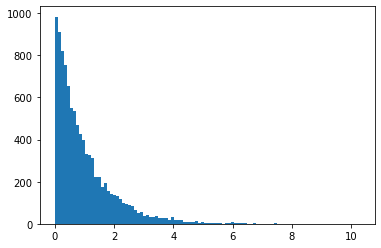

In [34]:
import numpy as np
import matplotlib.pyplot as plt
# generate 10000 x~unif(0,1) and print the first 10
x = np.random.uniform(low = 0, high = 1, size = 10000)
print(x[:10])
# let y = -log(x), and print the last 10 elem in y
y = -np.log(x) # y~exp(1)
print(y[-10:])
# plot the histogram of y
plt.hist(y,bins=100)
plt.show()


#### Linear Algebra
- Transpose by `MATRIX.transpose()`
- Matrix Multiplication by `MATRIX_A.dot(MATRIX_B)`
- Matrix Inversion by `np.linalg.inv(MATIX)` [NOT RECOMMEND]
  - If the final result is to cal. $A^{-1}x$, then do not try to first cal the inverse then cal the mul. Insead, use `np.linalg.solve(A,x)` to directly get the result.
    - Avoiding cal the inverse of a matrix will largely improve the computing efficiency.
- Eign value and eign vector by `np.linalg.eigh(MATRIX)`

### Supplements

#### Data Science Bookcamp, Five Python Projects: Chapter3 Simulation Using Numpy
*While installing `Matplotlib`, `NumPy` will be automatically installed as its dependent package.*

##### 1. Coin Tossing and Dice Rolling Simulation
- Simulating Dice Rolling
  - Specify random result using `np.random.seed(0)` to make it repeatable
  - Get a random integer between $[m,n)$ using `np.random.randint(m,n)`

In [35]:
import numpy as np
np.random.seed(123)
die_roll = np.random.randint(1,7)
print(f"die rolling: {die_roll}")
assert 1 <= die_roll <=6 #`assert` will help check if the result fits the assertion

die rolling: 6


- Simulating tossing
  - To change the `randint()`, we can have different simulations. 
  - Pay attention to the `print()` statement, and note how to insert an *if-else* statement within a `print`
  - Also notice how it could be repeated for 10 times
    - In Python, initially you might find it not that handy to use `for` statements than that of in *C++* by `for (int i=1, i<=n, i++)`, since if you simply switch this statement to python by `for i in range(10)`, it might return error by not predefining var `i`. Thus that is why have to introduce the temp var `_` serve as the `i` in *C++*. `_` will be disposed as long as the `for` statement is done. You may just remeber this statement and simply use it!

In [36]:
np.random.seed(123)
coin = np.random.randint(0,2)
print(f"Coin landed on {'heads' if coin == 1 else 'tails'}")
coins = [np.random.randint(0,2) for _ in range (10)]
print(f"10 times result: {coins}")

Coin landed on tails
10 times result: [1, 0, 0, 0, 0, 0, 1, 1, 0, 1]


- Plot the frequency of coin simulation
  - Although unlike *C++*, we do not have to predefine every var we use by `int x` or `float y` in python, but initiallizaiton is also required. In this section, note the use of `coin_flips=[]`, etc.
  - To add something to the end of a list, use `LIST.append('NEW_ELEMENT')`
  - Also notice the usage of `matplotlib.pyplot` package

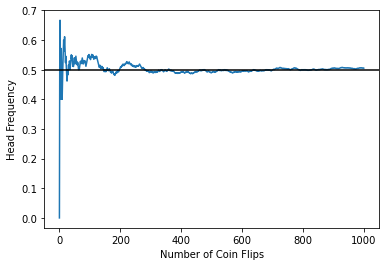

In [37]:
import matplotlib.pyplot as plt
np.random.seed(6)
# define a function to count num of heads and num of total trials
def heads_freq (coin_sequence):
    heads_num = 0
    total_num = len(coin_sequence)
    for coin in coin_sequence:
        if coin == 1:
            heads_num = heads_num + 1
    freq = heads_num/total_num
    return freq

# simulating tossing
coin_flips = []
freq = []
for _ in range (1000):
    coin_flips.append(np.random.randint(0,2))
    freq.append(heads_freq(coin_flips))

# plotting
plt.plot(list(range(1000)),freq)
plt.axhline(0.5,color='k')
plt.xlabel("Number of Coin Flips")
plt.ylabel("Head Frequency")
plt.show()



## II. Iteration and Iterator in Python

### Supplements

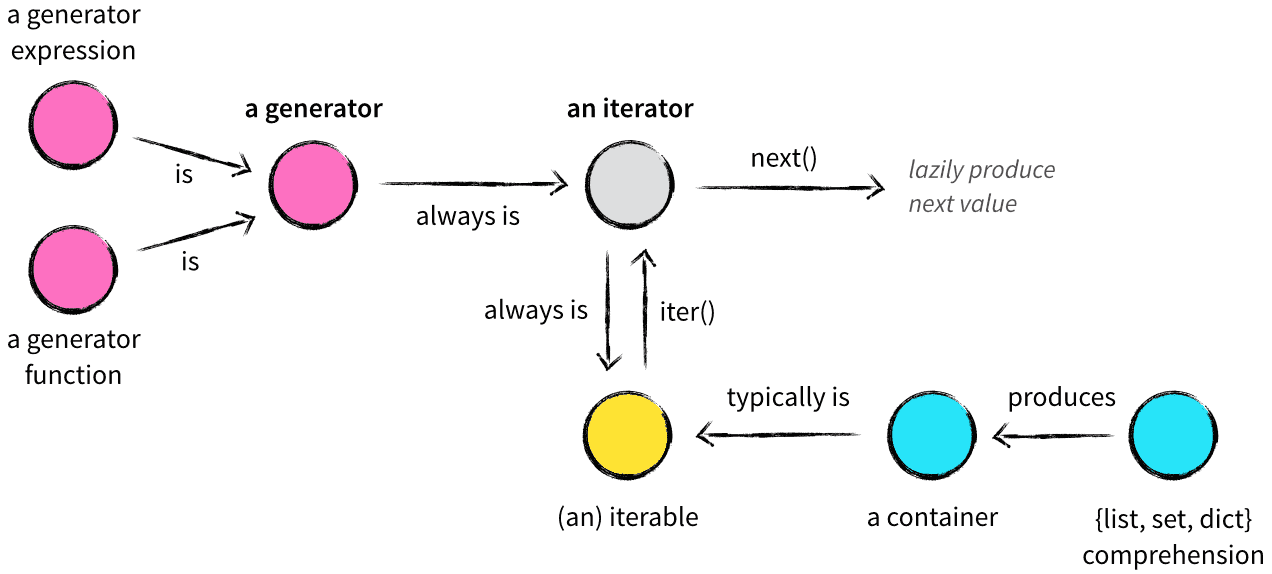

- **Container**
  - Definition & Properties
    - A data structure to save datas. 
    - Can be applied with `in` `not in` to see if a certain elem is in the container. 
    - Usually all elems are placed in the memory. 
  - Typical Examples
    - string
      - `'h' in 'hello'`
    - list
      - ` 1 in [1,2,3]`
    - set
      - ` 1 in {1,2,3}`
    - tuple
      - ` 1 in (1,2,3)`
    - dict
      - ` 1 in {1:'one',2:'two',3:'three'}`

- **Iterator**
  - Definition & Properties
    - An iterator will not load all data to the memory at once ("lazy evaluation")
    - If no more elem in the container, the iterator will return `StopIteration`
  - Typical Functions in Iteration
    - `ITERATOR_NAME = iter(CONTAINER_NAME)`: if there is a iteratable container, you can use it to transfer it into a iterator.
    - `next(ITERATOR_NAME)`: it will start iteration until it reaches the last elem (and then `StopIteration`)
      - *The underlying logic of `for` statement is to apply `next()` function repeatedly.*

- **Generator**
  - Definition & Properties
    - Generators are those functions who use `yield` rather than `return` to return values. 
    - **A Generator MUST be an Iterator**
    - Every time the `yield` function is executed, a value will be returned, and additionally